# Удержание клиентов фитнес-центра

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-0">Введение</a></span></li><li><span><a href="#Раздел-1.-Изучение-и-предобработка-данных-" data-toc-modified-id="Раздел-1.-Изучение-и-предобработка-данных--1">Раздел 1. Изучение и предобработка данных <a name="step1"></a></a></span></li><li><span><a href="#Раздел-2.-Исследовательский-анализ-данных-" data-toc-modified-id="Раздел-2.-Исследовательский-анализ-данных--2">Раздел 2. Исследовательский анализ данных <a name="step2"></a></a></span></li><li><span><a href="#Раздел-3.-Построение-модели-прогнозирования-оттока-клиентов-" data-toc-modified-id="Раздел-3.-Построение-модели-прогнозирования-оттока-клиентов--3">Раздел 3. Построение модели прогнозирования оттока клиентов <a name="step3"></a></a></span></li><li><span><a href="#Раздел-4.-Кластеризация-клиентов-" data-toc-modified-id="Раздел-4.-Кластеризация-клиентов--4">Раздел 4. Кластеризация клиентов <a name="step4"></a></a></span></li><li><span><a href="#Раздел-5.-Базовые-рекомендации-по-работе-с-клиентами-" data-toc-modified-id="Раздел-5.-Базовые-рекомендации-по-работе-с-клиентами--5">Раздел 5. Базовые рекомендации по работе с клиентами <a name="step5"></a></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Чек-лист-доработок" data-toc-modified-id="Чек-лист-доработок-5.0.1">Чек-лист доработок</a></span></li></ul></li></ul></li></ul></div>

# Введение

Перед нами представлена информация о посещениях фитнес-клуба «Культурист-датасаентист» клиентами. Есть сведения о их профиле, а также об их поведении (посещении, покупке абонемента) в предыдущем месяце, а также инофрмация о факте ухода этих клиентов в текущем месяце. 

Основная таблица содержит следующие поля:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра (кафе, спорт-товары, косметический и массажный салон);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц.


Цель работы: выработать идеи по удержанию клиентов фитнес-центра. В частности, в ходе работы планируется оценить следующие аспекты:
- вычислить прогнозную вероятность оттока для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- разработать рекомендации по повышению качества работы с клиентами.

# Раздел 1. Изучение и предобработка данных <a name="step1"></a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
919,0,1,0,0,1,1,0,33,97.809437,1.0,0,1.083471,0.828722,1
3423,0,1,0,1,0,1,1,26,46.943630,1.0,2,1.069458,1.147335,0
746,1,1,1,0,0,12,0,30,261.591305,12.0,1,0.989806,0.835060,0
790,1,1,1,1,1,6,1,32,49.849189,6.0,0,2.337641,2.327688,0
3061,1,1,1,1,0,6,0,32,262.947060,5.0,3,2.283966,2.349141,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Мы видим, что исходная таблица состоит из 4000 строк (наблюдений о поведении 4000 клиентов) и 14 колонок с признаками, один из которых - Churn - отток клиентов - является целевым для нашего исследования.
В таблице нет пропущенных значений. Все представленные переменные - числовые - типов float или integer. Можно было бы заменить их на булевы там, где речь идет о наличи или отсутствии конкретного признака, но тогда будет сложнее обрабатывать данные для построения модели прогнозирвоания оттока клиентов.
Скорректируем написание названий столбцов, чтобы они писались одинаково: прописными буквами. Также проверим датасет на наличие дубликатов.

In [5]:
gym.columns = gym.columns.str.lower()

In [6]:
gym[gym.duplicated() == True]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn


Названия колонок заменили, дубликатов не обнаружено, можно приступать к анализу данных.

# Раздел 2. Исследовательский анализ данных <a name="step2"></a>

<b> Изучение отсутствующих признаков, средних значений и стандартных отклонений </b>

На этапе предобработки мы увидели, что отсутствующих признаков у нас нет. Теперь посмотрим на средние значения и стандартные отклонения по разным признакам.

In [7]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Видим, что в столбцах с признаками вида 0 - отсутствие и 1 - присутствие все данные заданы корректны (присутствуют именно 0 и 1). Разделение по полу у нас почти ровное: будем считать, что 1 означает женщин, 0 - мужчин. Средний возраст клиентов - 29 лет. Ожидаемо, бОльшая часть клиентов (почти 85%) проживает или работает в районе нахождения клуба. Почти половина клиентов - участники партнерской программы, а почти треть пришла в клуб по рекомендации друзей. 

Что касается особенностей в пользовании услугами зала, более половины клиентов оформляют абонемент на месяц, хотя в среднем "длина" абонемента составляет 4,7 месяца. В среднем клиенты ходят к нам чуть менее 4 месяцев, хоть есть и настоящие фанаты - они уже 31 месяц (более 2,5 лет) с нами. 
Средняя частота посещений в неделю за все время действия абонмента - 2 занятия, а за последний месяц - чуть меньше, т.е. обычно люди начинают ходить в зал более активно, а со временем количество тренировок снижается, иногда до 0.

Среди изучаемых клиентов 26% "отваливаются" - больше четверти, нужно что-то с этим делать!

В целом, при взгляде на данные, не видно больших аномалий или нелогичных, иррациональных значений. Можно двигаться дальше.

<b> Анализ средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался </b>

Посмотрим, как различаются показатели для клиентов, которые остались в фитнес-клубе и тех, кто ушел.

In [8]:
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Клиенты в обеих группах совпадают по полу и возрасту, и те и другие в равной доле оставили свой контактный номер. 

При этом клиенты, которые отказались от посещения «Культуриста-датасаентиста», имели более "короткие" абонементы (1,7 месяцев против 5,7), т.е. скорее всего они изначально не были уверены в том, что будут продолжительное время ходить на занятия, большинство из них новички, тогда как оставшиеся знакомы с клубом уже в среднем почти 5 месяцев. 

Только 18% "отказников" пришли от друзей (против 35% у оставшихся) и 35% пришли по промо от компании (среди оставшихся 53%). Ушедшие клиенты посещали меньше групповых занятий (27% против 46%), в среднем посещали меньше занятий в неделю (за последний месяц 1 и 2 раза в среднем соответсвенно), а также тратили меньше денег на доп.услуги. 

Таким образом, поведение клиентов, которые собираются покинуть клуб, и тех, кто планирует остаться, различается довольно сильно.

<b> Построение столбчатых гистограмм и распределение признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток) </b>

In [9]:
gym_churn = gym.query('churn == 1')

In [10]:
gym_not_churn = gym.query('churn == 0')

In [11]:
len(gym_churn)

1061

In [12]:
len(gym_not_churn)

2939

Разбили нашу таблицу на две: на клиентов, которые покинули клуб (1061 строка), и на тех, кто остался (2939 строк). Теперь построим по ним графики признаков.

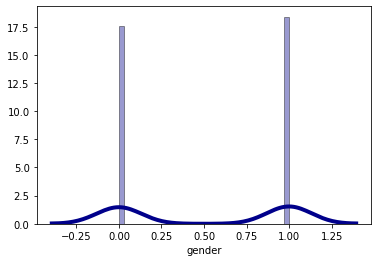

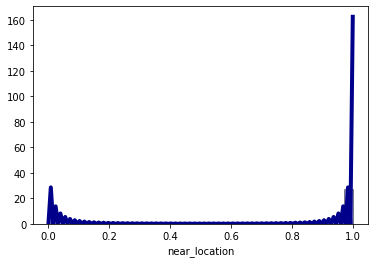

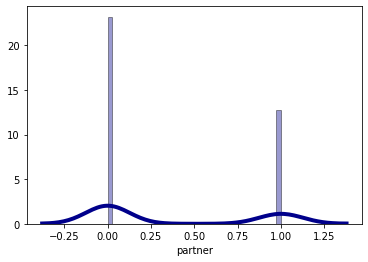

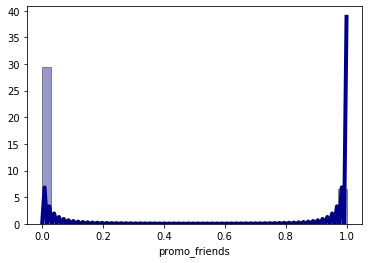

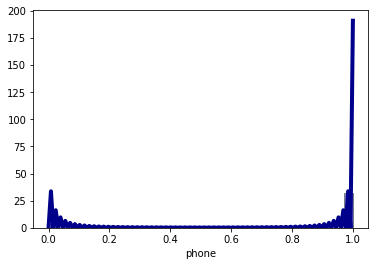

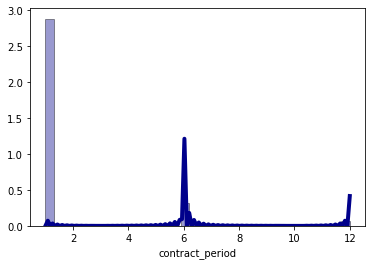

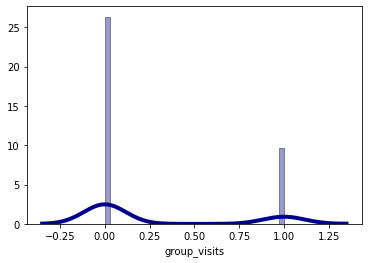

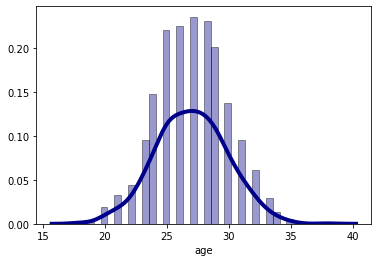

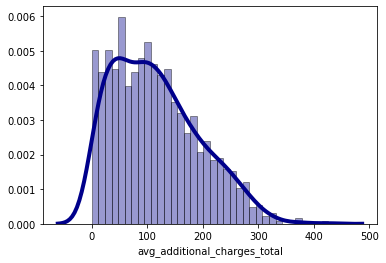

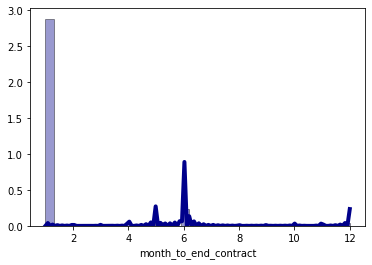

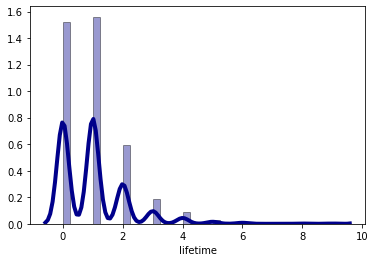

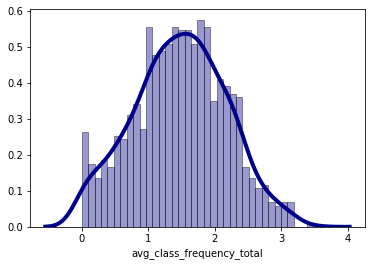

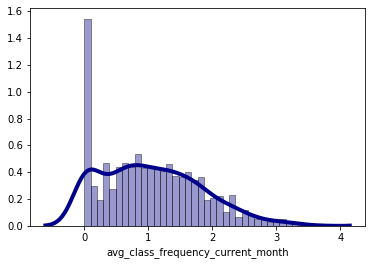

In [13]:
for col in gym_churn.drop('churn', axis = 1).columns:
    sns.distplot(gym_churn[col], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show()

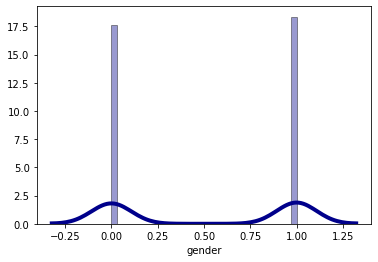

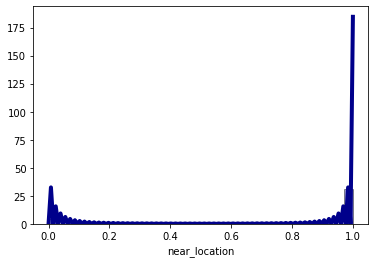

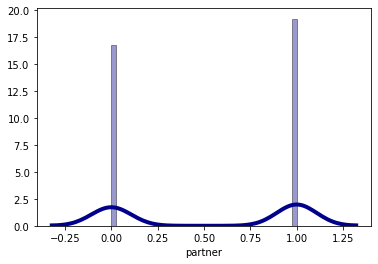

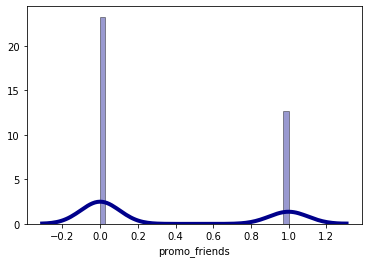

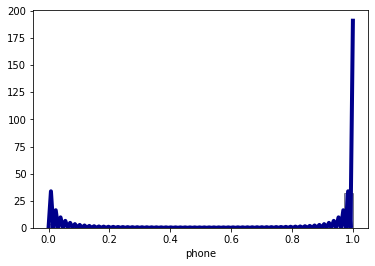

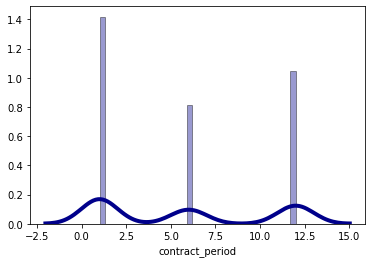

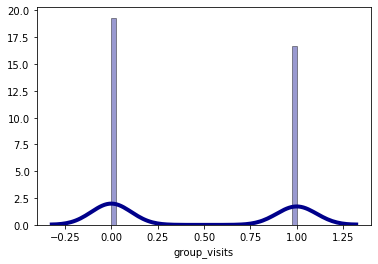

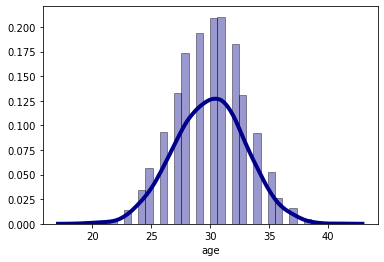

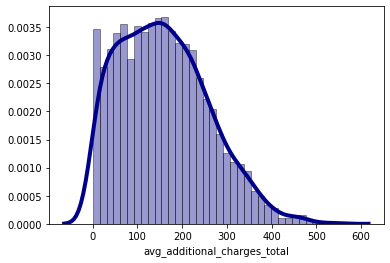

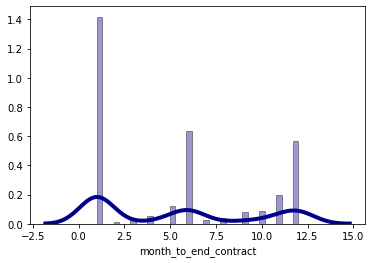

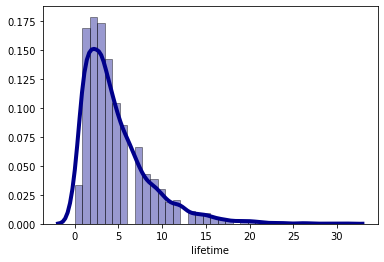

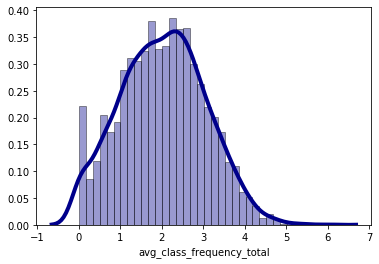

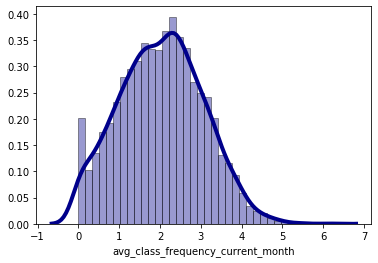

In [14]:
for col in gym_not_churn.drop('churn', axis = 1).columns:
    sns.distplot(gym_not_churn[col], hist=True, kde=True, bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.show()

По графикам распределения признаков для таблиц по клиентам, которые покинули клуб, и по тем, кто остался, видны похожие  различия, что и наблюдаются для средних этих выборок. Так, видно, что длительность текущего абонемента у тех, кто остался в клубе, больше, чем в половине случаев, составляет 6 или 12 месяцев. Среди уходящих же абсолютное большинство выбирали абонемент на 1 месяц.

Еще интересно, что для оставшихся среднее количество посещений за последний месяц и за период с начала действия абонемента практически не отличается (графики почти идентичны), а вот среди ушедших они сильно различаются: в последнем месяце люди перестали посещать занятия (т.е. получается, что те, у кого абонемент был дольше, чем 1 месяц, "скатывались" к отсутствию занятий, а новички просто в целом отходили 1 месяц на редкие тренировки и затем забросили их окончательно). 

<b> Матрица корреляций </b>

In [15]:
gym.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


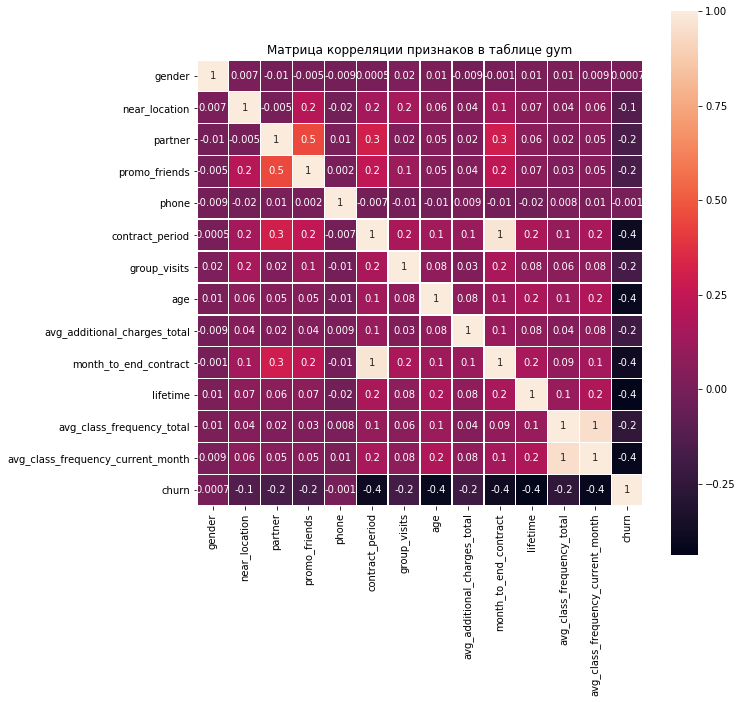

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(gym.corr(), annot = True, square=True, linewidths=.5, fmt='.1g')
plt.title('Матрица корреляции признаков в таблице gym')
plt.show()

Наблюдается сильная прямая зависимость между парами переменных Длительность текущего действия абонемента и Число месяцев до окончания действия абонемента, а также Средним числом посещенных за неделю занятий в текущем месяце и за весь период действия абонемента. Очевидно, данные переменные описывают аналогичные характеристики, поэтому, чтобы избежать искажений в модели, уберем 2 столбца из данных при дальнейшем анализе.

<b> Вывод </b>

Мы изучили признаки в целом для всей таблицы данных, а также отдельно для тех клиентов, которые ушли в отток, и тех, кто остался в фитнес-клубе.
1. 26% клиентов покидают фитнес-клуб.
2. Среди данных не видно явных аномалий и значений, которые могут исказить модель.
3. Видны явные отличия в поведении людей из обеих групп. Так, длительность текущего абонемента у тех, кто остался в клубе, больше, чем в половине случаев, составляет 6 или 12 месяцев, а у уходящих в основном равна 1 месяцу. Ушедшие клиенты посещали меньше групповых занятий (27% против 46%) и в среднем посещали меньше занятий в неделю (за последний месяц 1 и 2 раза в среднем соответсвенно).
4. 2 переменные попарно имеют сильную прямую зависимость между собой. Чтобы избежать искажения модели, в дальнейшем не будем учитывать признаки Число месяцев до окончания действия абонемента и Средняя частота посещений в неделю за все время с начала действия абонемента ('month_to_end_contract' и 'avg_class_frequency_total').

# Раздел 3. Построение модели прогнозирования оттока клиентов <a name="step3"></a>

Наша задача представляет собой задачу обучения с учителем (т.к. есть конкретный набор возможных результатов), а именно бинарной классификации (т.к. возможных исходов всего 2 - 0 (клиент остался) и 1 (клиент ушел)). Для того, чтобы спрогнозировать, останется клиент или уйдет, применим 2 модели: логистическую регресиию и случайный лес. После чего сравним их метрики.

Чтобы построить прогнозную модель, для начала разделим наши данные на признаки (матрица X) и целевую переменную (у) и разобьем данные на обучающую и валидационную выборку в пропорции 4:1.

In [17]:
X = gym.drop(columns = ['churn', 'month_to_end_contract', 'avg_class_frequency_total'])
y = gym['churn']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [21]:
print('Logistic Regression')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_lr)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_lr)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_lr)))

Logistic Regression
Accuracy: 0.90
Precision: 0.79
Recall: 0.79


In [22]:
model_rf = RandomForestClassifier(random_state=0, n_estimators = 100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [23]:
print('Random Forest')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_rf)))

Random Forest
Accuracy: 0.90
Precision: 0.81
Recall: 0.75


<b> Вывод </b>

Обе модели с вероятностью 90% прогнозируют верно, случайный лес дает чуть более точный прогноз по правильным ответам среди целевого класса, а логистическая регрессия чуть точнее в подсчете того, сколько реальных объектов "1" класса обнаружено. В нашем случае recall более показателен - лучше "заподозрить" клиента в том, что он хочет нас покинуть, даже если это не так, и начать стимулировать его к посещениям, определенным занятиям, возможно, предложить акции или скидки.

Таким образом, для целей нашего исследования модель логистической регрессии предпочтительнее.

# Раздел 4. Кластеризация клиентов <a name="step4"></a>

Определим, какие группы клиентов можно выделить по имеющимся признакам, т.е. постоим модель обучения без учителя - проведем кластеризацию.

Для этого сначала стандартизируем данные, построим матрицу расстояний и посмотрим, как выглядит дендрограмма.

In [24]:
X_km = gym.drop(columns = ['churn', 'month_to_end_contract', 'avg_class_frequency_total'])

In [25]:
scaler = StandardScaler()
X_st = scaler.fit_transform(X_km)

In [26]:
linked = linkage(X_st, method = 'ward')

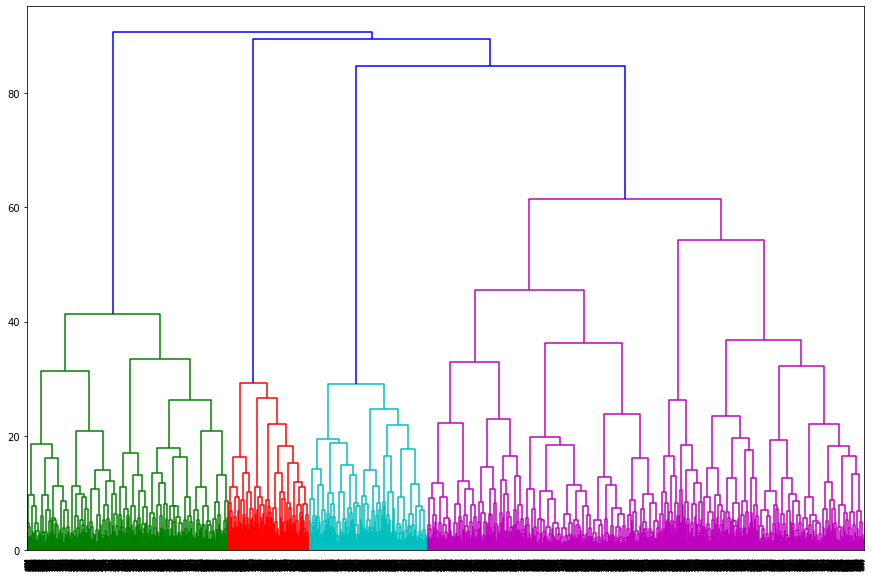

In [27]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Судя по виду дендрограммы, мы можем выделить 4 основные кластера-группы клиентов фитнес-центра. Однако одна из "веток" дерева получилась довольно большой по размеру, поэтому здесь можно выделить из 1 группы 2 подгруппы.

Спрогнозируем эти кластеры на основе алгоритма K-Means с числом кластеров, равным 5.

In [28]:
km = KMeans(n_clusters = 5, random_state=42)

In [29]:
labels = km.fit_predict(X_st)

In [30]:
gym['cluster_km'] = labels

In [31]:
gym.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.498214,0.000000,0.487500,0.078571,1.0,3.016071,0.233929,28.698214,137.520958,2.839286,3.019643,1.768217,1.601681,0.401786
1,0.505230,0.993724,0.842050,0.626569,1.0,9.881799,0.630753,30.324268,174.496956,8.913180,5.480126,2.245135,2.249507,0.007322
2,0.528980,1.000000,0.000000,0.055026,1.0,2.750550,0.405723,29.040352,142.890623,2.610418,3.288335,1.839021,1.704386,0.331621
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
4,0.484354,1.000000,0.934694,0.541497,1.0,2.715646,0.268027,28.278912,127.237836,2.582313,2.674830,1.574446,1.404365,0.372789


In [32]:
gym['cluster_km'].value_counts()

2    1363
1     956
4     735
0     560
3     386
Name: cluster_km, dtype: int64

Мы получили 5 групп, неравномерных по размеру. В них наблюдаются определенные особенности: так, все, кто не оставил номер телефона, попали в группу 3, в среднем они посещают клуб почти 5 месяцев, и в 27% случаев покидают клуб.

Группа 2 характеризуется тем, что все ее участники проживают или работают в районе нахождения клуба и при этом среди них никто не является сотрудником компаний-партнеров клуба. Они же имеют в среднем почти самые короткие абонементы (2,7 месяцев). 

Самые "преданные" - участники группы 1. Они почти всегда остаются в клубе (с вероятностью 99%), при этом бОльшая часть из них - 62% - пришла по рекомендации друзей (видимо, поход в клуб с друзьями больше способствует регулярности посещения занятий), часто посещают групповые занятия (более 63% случаев) и их абонементы самые "длинные" - в среднем, почти 10 месяцев. При этом данная группа и почти самая многочисленаня - здесь оказалась четверть всей выборки.

Построим распределения признаков для кластеров. Для непрерывных переменных используем боксплот, а для дискретных — столбчатые диаграммы.

In [37]:
discrete = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']
continuous = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total']

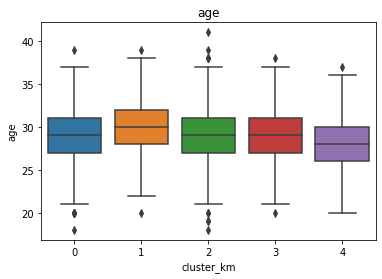

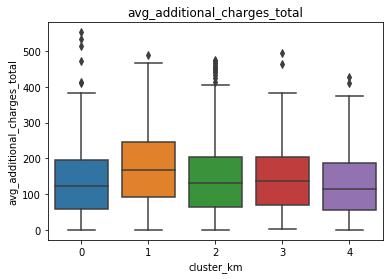

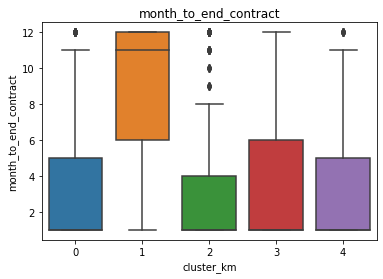

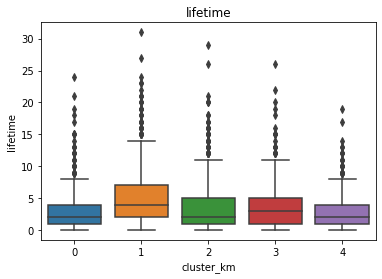

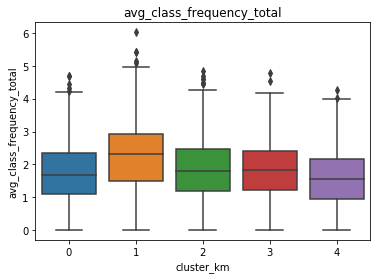

In [39]:
for col in continuous:
    sns.boxplot(x='cluster_km', y=col, data=gym)
    plt.title(col)
    plt.show()

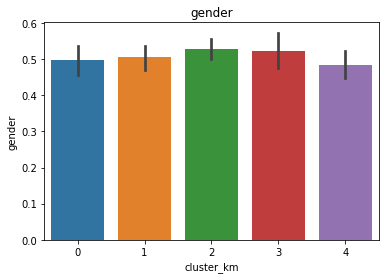

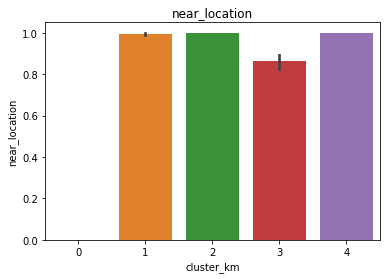

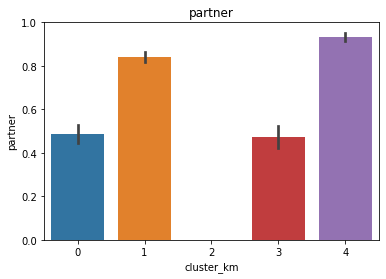

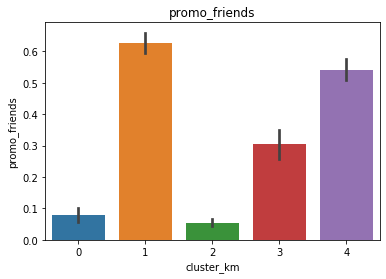

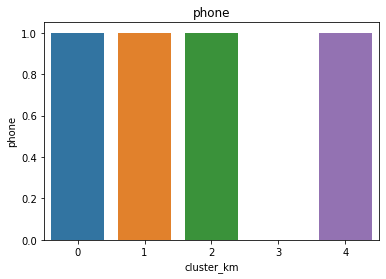

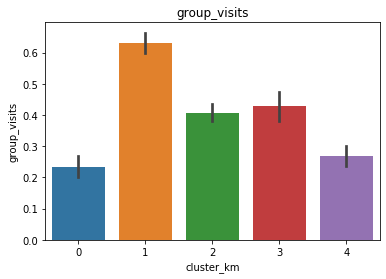

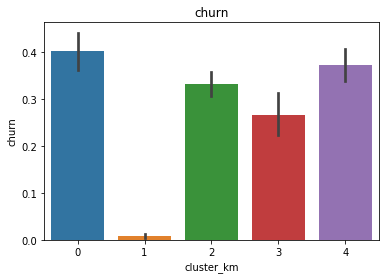

In [42]:
for col in discrete:
    sns.barplot(x='cluster_km', y=col, data=gym)
    plt.title(col)
    plt.show()

В целом, графики отражают те же тенденции, которые видны по цифрам выше. По ним еще более ярко видно, что, например, у 1ой группы отмечаются самые большие значения month_to_end_contract - логично, что пользователи, наименее склонные к оттоку, являются обладателями абонементов, которые будут действовать дольше всего - минимально от 6 месяцев, а в среднем - 11. 

<b> Вывод </b>

Алгоритм K-Means позволил сделать кластеризацию клиентов и разделить их на 5 групп. Участники одной из групп (1) менее других склонны к оттоку, в то время как остальные с разной долей вероятности покидают клуб (от 26% до 40%). Таким образом, совокупность признаков, характерных для участников 1ого кластера, дает нам большую вероятность того, что такой человек скорее всего не покинет фитнес-центр в ближайший месяц. 

К таким характеристикам относится покупка абонемента на более длительный срок (в среднем почти 10 месяцев), регистрация по приглашению друзей (в 63% случаев), проживание или работа в районе нахождения фитнес-клуба (почти в 100% случаев), тенденция к посещению групповых занятий (63% случаев), посещаемость занятий в неделю выше среднего (2,3 раза в неделю), наиболее высокие среди остальных групп траты на дополнительные товары (175 рублей против средних 147 рублей). Таким образом, для стимулирования продолжения занятий пользователями, нужно выработать стратегию по внедрению таких инициатив, которые бы улучшали указанные характеристистики в поведении клиентов.

# Раздел 5. Базовые рекомендации по работе с клиентами <a name="step5"></a>

На основании проведенного анализа и сформулированных выводов можно дать следующие рекомендации по удержанию клиентов фитнес-клуба.
1. Стимулировать клиентов к рекомендации друзьям фитнес-клуба. Ввести рефералную программу, предусматривающую увеличение % скидки на абонемент для самого клиента и его друга, которого он привел. Причем увеличивать % как за каждого нового приведенного друга, так и за "срок", который этот новый пользователем является клиентом. Для стимулирования более продолжительного посещения клуба, сделать такую акцию только при покупке абонементов от 3 месяцев.
2. Стимулировать клиентов к посещению групповых занятий. Делать рассылки с преимуществами таких занятий. В соц.сетях уделять больше внимания этой теме, освещать планы тренировок и возможные результаты. Рассказывать о преимуществах. Провести опрос среди текущих посетителей групповых занятий, что им нравится на тренировках и почему они туда ходят. Опросить кого-то из клиентов в формате интервью (с их согласия) и опубликовать видео также в соц.сетях.
3. Делать акцент на продаже абонементов на более длительный срок. Раз-два в год устраивать "распродажи" годовых абонементов со значительной скидкой. Давать дополнительные бонусы при покупке таких абонементов (например, сеанс массажа раз в месяц бесплатно. Или дополнительная скидка при покупке спортпитания).
4. Стимулировать клиентов на дополнительные траты в клубе. Рассказывать о преимуществах косметических услуг, о том, что ЗОЖ - не только тренировки, но правильно подобранное питание, массажи и пр. Возможно, привлечь специалиста-нутрициолога или консультанта косметического кабинета с возможностью бесплатной консультации (опять же, можно включить как опцию для клиентов с "долгосрочным" абонементом).

Совокупность данных мероприятий, по оценке, приведет к сокращению оттока клиентов фитнес-клуба.